Une commande "Run All" permettra d'exploiter le notebook correctement.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score

In [2]:
#fonction qui permet le preprocessing des données de chaque sujet

def add_subject(filename):
    
    df = pd.read_pickle(filename)
    
    
    chest = df['signal']['chest']
    wrist = df['signal']['wrist']
    

    
    activities = df['activity'].ravel()
    
    labels = []
    
    
    new_chest_ACC_x = []
    new_chest_ACC_y = []
    new_chest_ACC_z = []

    new_wrist_ACC_x = []
    new_wrist_ACC_y = []
    new_wrist_ACC_z = []

    new_chest_ECG = []
    new_chest_Resp = []
    new_wrist_BVP = []
    
    
    for i, value in enumerate(df['label']):
        for x in range(0,8):
            labels.append(value)


    for i, value in enumerate(wrist['ACC']):
        if(i%8==0):
            new_wrist_ACC_x.append(value[0])
            new_wrist_ACC_y.append(value[1])
            new_wrist_ACC_z.append(value[2])


    for i, value in enumerate(wrist['BVP']):
        if(i%16==0):
            new_wrist_BVP.append(value)    

    for i, value in enumerate(chest['ACC']):
        if(i%175==0):
            new_chest_ACC_x.append(value[0])
            new_chest_ACC_y.append(value[1])
            new_chest_ACC_z.append(value[2])      

    for i, value in enumerate(chest['ECG']):
        if(i%175==0):
            new_chest_ECG.append(value)        

    for i, value in enumerate(chest['Resp']):
        if(i%175==0):
            new_chest_Resp.append(value) 

   
    real_new_df = pd.DataFrame({'ACC_W_x': new_wrist_ACC_x,
                           'ACC_W_y': new_wrist_ACC_y,
                           'ACC_W_z': new_wrist_ACC_z,     
                          'BVP': np.asarray(new_wrist_BVP).ravel(),
                          'EDA': wrist['EDA'].ravel(),
                          'TEMP': wrist['TEMP'].ravel(),
                          'ACC_C_x': new_chest_ACC_x,
                          'ACC_C_y': new_chest_ACC_y,
                          'ACC_C_z': new_chest_ACC_z,      
                          'ECG': np.asarray(new_chest_ECG).ravel(),
                          'Resp': np.asarray(new_chest_Resp).ravel(),
                         })

    real_new_df = real_new_df.iloc[:len(labels)]
    real_new_df['Labels'] = labels
    
    if df['questionnaire']['Gender'] == ' m':
        real_new_df['Gender'] = [ 0 for x in range(0, len(labels))]
    else:
        real_new_df['Gender'] = [ 1 for x in range(0, len(labels))]
    
    real_new_df['Weight'] = [df['questionnaire']['WEIGHT'] for x in range(0, len(labels))]
    real_new_df['Age'] = [df['questionnaire']['AGE'] for x in range(0, len(labels))]
    real_new_df['Height']= [df['questionnaire']['HEIGHT'] for x in range(0, len(labels))]
    real_new_df['Skin'] = [df['questionnaire']['SKIN'] for x in range(0, len(labels))]
    real_new_df['Sport']= [df['questionnaire']['SPORT'] for x in range(0, len(labels))]
    
    real_new_df['activity'] = activities[:len(labels)] 
        
    return real_new_df

In [46]:
#fonction qui permet de visualiser plus facilement les classification reports

def plot_classification_report(cr, title='Classification report ', with_avg_total=False, cmap=plt.cm.Blues):

    lines = cr.split('\n')
    
    classes = ["Sitting still",
                "Ascending/Descending stairs",
                "Table Soccer",
                "Cycling",
                "Driving car",
                "Lunch break",
                "Walking",
               "Working"]
   
    plotMat = []
    
    for line in lines[2 : (len(lines) - 3)]:
        t = line.split()
        if len(t) == 0:
            break
        else:
            v = [float(x) for x in t[1: len(t) - 1]]
            plotMat.append(v)

    if with_avg_total:
        aveTotal = lines[len(lines) - 1].split()
        classes.append('avg/total')
        vAveTotal = [float(x) for x in t[1:len(aveTotal) - 1]]
        plotMat.append(vAveTotal)


    plt.imshow(plotMat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    x_tick_marks = np.arange(3)
    y_tick_marks = np.arange(len(classes))
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
    plt.yticks(y_tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('Classes')
    plt.xlabel('Measures')

In [4]:
#on concatène les données de tous les sujets dans un seul DataFrame

directory  = "/home/clement/Downloads/data(1)/PPG_FieldStudy/"
pickle = ""

df_all_subjects = pd.DataFrame()

for dirname in os.listdir(directory):
    subject = directory + dirname
    for filename in os.listdir(subject):
        if ".pkl" in filename:
            pickle = subject + "/" + filename
            print(pickle)
            df_sub = pd.DataFrame(add_subject(pickle))
            print(df_sub)
            print(type(df_sub))
            frames = [df_all_subjects, df_sub]    
            df_all_subjects = pd.concat(frames, sort = False)
            
df_all_subjects         

/home/clement/Downloads/data(1)/PPG_FieldStudy/S14/S14.pkl
        ACC_W_x   ACC_W_y   ACC_W_z    BVP       EDA   TEMP  ACC_C_x  ACC_C_y  \
0     -0.406250  0.250000  0.859375  55.57  0.481694  32.21   0.8930   0.1262   
1     -0.406250  0.250000  0.859375  -2.17  0.480412  32.21   0.9018   0.1326   
2     -0.406250  0.250000  0.859375 -88.37  0.481694  32.21   0.8850   0.1340   
3     -0.421875  0.250000  0.859375  51.18  0.481694  32.21   0.8986   0.1290   
4     -0.406250  0.250000  0.859375  31.79  0.479131  32.21   0.8974   0.1306   
...         ...       ...       ...    ...       ...    ...      ...      ...   
35803 -0.812500 -0.140625  0.343750  47.21  2.321987  34.34   0.8818   0.0700   
35804 -0.468750 -0.312500  0.859375 -18.96  2.316863  34.34   0.8586   0.0590   
35805 -0.937500 -0.296875  0.390625 -16.00  2.315581  34.34   0.9094   0.0850   
35806 -0.218750 -0.281250  0.703125  23.51  2.301489  34.34   0.9018   0.1096   
35807 -1.000000 -0.328125 -0.062500   6.27  2.2899

        ACC_W_x   ACC_W_y   ACC_W_z     BVP       EDA   TEMP  ACC_C_x  \
0     -0.500000  0.343750  0.765625   52.28  0.253940  32.00   0.8930   
1     -0.500000  0.343750  0.765625   17.26  0.253940  32.00   0.8946   
2     -0.500000  0.343750  0.765625  -43.59  0.253940  32.00   0.8954   
3     -0.500000  0.343750  0.765625    0.01  0.252659  32.00   0.8856   
4     -0.500000  0.359375  0.765625   45.14  0.252659  32.00   0.8888   
...         ...       ...       ...     ...       ...    ...      ...   
36515 -0.687500 -0.328125  0.578125  -17.99  1.485319  34.77   0.9066   
36516 -0.890625 -0.375000 -0.281250   72.91  1.494287  34.77   0.8782   
36517 -0.656250 -0.046875  0.515625  -26.63  1.445602  34.77   0.9082   
36518 -0.500000  0.125000  0.718750  121.53  1.477632  34.77   0.8646   
36519 -0.562500  0.125000  0.796875 -151.03  1.469945  34.77   0.9130   

       ACC_C_y  ACC_C_z       ECG      Resp     Labels  Gender  Weight  Age  \
0       0.0610   0.1790 -0.017349 -0.627136 

        ACC_W_x   ACC_W_y   ACC_W_z    BVP       EDA   TEMP  ACC_C_x  ACC_C_y  \
0     -0.671875  0.343750  0.656250 -16.59  0.261329  31.09   0.8674   0.1614   
1     -1.046875  0.687500  0.437500 -15.82  0.263891  31.09   0.8446   0.2058   
2     -0.875000 -0.015625  0.234375  18.09  0.263891  31.09   0.8690   0.1686   
3     -1.265625 -0.015625 -0.140625   5.95  0.262610  31.09   0.8056  -0.0670   
4     -1.000000 -0.156250 -0.125000 -31.28  0.261329  31.07   0.8830   0.0072   
...         ...       ...       ...    ...       ...    ...      ...      ...   
31723 -0.296875 -0.015625  0.937500  25.31  0.931639  34.00   0.8942   0.0204   
31724 -0.296875 -0.015625  0.953125   1.58  0.931639  34.00   0.8986   0.0138   
31725 -0.015625 -0.015625  1.015625 -31.06  0.931639  34.00   0.8952   0.0124   
31726 -0.171875  1.656250  1.984375  24.94  0.923953  34.00   0.8968   0.0146   
31727 -1.156250 -0.015625 -0.546875   1.79  0.912424  34.00   0.8922   0.0138   

       ACC_C_z       ECG   

        ACC_W_x   ACC_W_y   ACC_W_z     BVP       EDA   TEMP  ACC_C_x  \
0     -0.765625  0.250000  0.593750    7.87  0.120438  30.61   0.9176   
1     -0.765625  0.265625  0.578125   -9.59  0.120438  30.61   0.8954   
2     -0.781250  0.250000  0.562500  -10.45  0.121719  30.59   0.9138   
3     -0.781250  0.218750  0.562500   11.40  0.119157  30.59   0.9090   
4     -0.781250  0.234375  0.562500    4.83  0.121719  30.59   0.9102   
...         ...       ...       ...     ...       ...    ...      ...   
42563 -0.453125  0.859375 -0.156250   21.84  0.210393  33.99   0.8960   
42564 -0.421875  0.921875 -0.015625  -59.04  0.211674  33.99   0.9466   
42565 -0.406250  0.921875  0.062500   23.69  0.214236  33.99   0.9674   
42566 -0.437500  0.906250 -0.078125  164.15  0.215518  33.99   0.8838   
42567 -1.578125  0.921875 -0.421875 -101.82  0.215518  33.97   1.0114   

       ACC_C_y  ACC_C_z       ECG       Resp     Labels  Gender  Weight  Age  \
0      -0.0178  -0.0872 -0.100479   7.35015

,ACC_W_x,ACC_W_y,ACC_W_z,BVP,EDA,TEMP,ACC_C_x,ACC_C_y,ACC_C_z,ECG,Resp,Labels,Gender,Weight,Age,Height,Skin,Sport,activity
0,-0.406250,0.250000,0.859375,55.57,0.481694,32.21,0.8930,0.1262,-0.0570,0.774811,1.605225,72.674729,1,67.0,26,170.0,3,4,0.0
1,-0.406250,0.250000,0.859375,-2.17,0.480412,32.21,0.9018,0.1326,-0.0602,0.165527,0.588989,72.674729,1,67.0,26,170.0,3,4,0.0
2,-0.406250,0.250000,0.859375,-88.37,0.481694,32.21,0.8850,0.1340,-0.0570,-0.013779,-0.428772,72.674729,1,67.0,26,170.0,3,4,0.0
3,-0.421875,0.250000,0.859375,51.18,0.481694,32.21,0.8986,0.1290,-0.0550,-0.017258,-1.365662,72.674729,1,67.0,26,170.0,3,4,0.0
4,-0.406250,0.250000,0.859375,31.79,0.479131,32.21,0.8974,0.1306,-0.0588,0.703308,-1.847839,72.674729,1,67.0,26,170.0,3,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,-0.921875,-0.109375,0.390625,10.57,0.447371,34.49,0.9124,0.0020,-0.0502,-0.055344,-1.042175,97.227479,1,62.0,24,168.0,3,5,0.0
36164,-0.921875,-0.109375,0.375000,-9.72,0.448652,34.47,0.9026,0.0064,-0.0844,-0.039505,0.434875,97.227479,1,62.0,24,168.0,3,5,0.0
36165,-0.937500,-0.093750,0.375000,-19.77,0.446090,34.47,0.9138,0.0048,-0.0878,0.143967,1.521301,97.227479,1,62.0,24,168.0,3,5,0.0
36166,-0.921875,-0.093750,0.375000,-0.08,0.444808,34.47,0.9310,-0.0022,-0.0738,-0.101852,1.988220,97.227479,1,62.0,24,168.0,3,5,0.0


In [5]:
df_all_subjects.corr()

,ACC_W_x,ACC_W_y,ACC_W_z,BVP,EDA,TEMP,ACC_C_x,ACC_C_y,ACC_C_z,ECG,Resp,Labels,Gender,Weight,Age,Height,Skin,Sport,activity
ACC_W_x,1.000000,0.051519,0.276090,1.214860e-02,0.064351,9.949577e-03,-0.023741,0.014017,0.006069,0.001306,0.003812,0.128259,-0.071392,0.084771,-0.030005,0.072867,0.019839,0.028786,0.023998
ACC_W_y,0.051519,1.000000,-0.094882,-3.869686e-03,0.024629,-1.131488e-01,0.058621,0.029698,0.225816,-0.000114,0.002309,0.251601,-0.056640,0.077454,-0.002375,0.053638,-0.039955,0.003741,-0.294839
ACC_W_z,0.276090,-0.094882,1.000000,3.393191e-03,0.042556,3.696606e-02,-0.113800,0.034330,-0.137749,-0.002178,-0.000031,-0.133693,-0.162616,0.114990,0.008398,0.124210,-0.002206,0.115001,0.180329
BVP,0.012149,-0.003870,0.003393,1.000000e+00,0.000307,8.849956e-07,0.000853,0.000363,0.000836,0.003908,0.001241,-0.000063,-0.000457,0.000463,0.000178,0.000345,-0.000069,0.000066,0.000311
EDA,0.064351,0.024629,0.042556,3.069730e-04,1.000000,1.094064e-01,-0.031760,0.155516,-0.093594,-0.000641,-0.002660,0.241786,0.056746,0.184688,-0.109249,0.219423,-0.185920,-0.230440,-0.129666
TEMP,0.009950,-0.113149,0.036966,8.849956e-07,0.109406,1.000000e+00,-0.002890,0.091948,-0.117156,0.000704,0.000071,0.058724,0.205685,0.033511,-0.248782,-0.031684,-0.111885,-0.136187,0.323418
ACC_C_x,-0.023741,0.058621,-0.113800,8.532606e-04,-0.031760,-2.889583e-03,1.000000,-0.022740,0.246767,0.026029,-0.007981,0.076191,0.024456,-0.134583,-0.068920,-0.105897,0.024581,0.049974,-0.051569
ACC_C_y,0.014017,0.029698,0.034330,3.625197e-04,0.155516,9.194841e-02,-0.022740,1.000000,-0.065898,0.006782,-0.002313,0.000157,0.056098,0.138414,0.004145,0.091768,-0.100720,0.015389,-0.043151
ACC_C_z,0.006069,0.225816,-0.137749,8.360436e-04,-0.093594,-1.171564e-01,0.246767,-0.065898,1.000000,0.004164,-0.009485,0.292629,-0.037849,-0.231548,-0.163647,-0.157870,-0.001155,0.124336,-0.128907
ECG,0.001306,-0.000114,-0.002178,3.907887e-03,-0.000641,7.042084e-04,0.026029,0.006782,0.004164,1.000000,0.005638,0.002239,0.001315,-0.000392,0.000245,-0.000788,-0.001071,-0.001200,0.001361


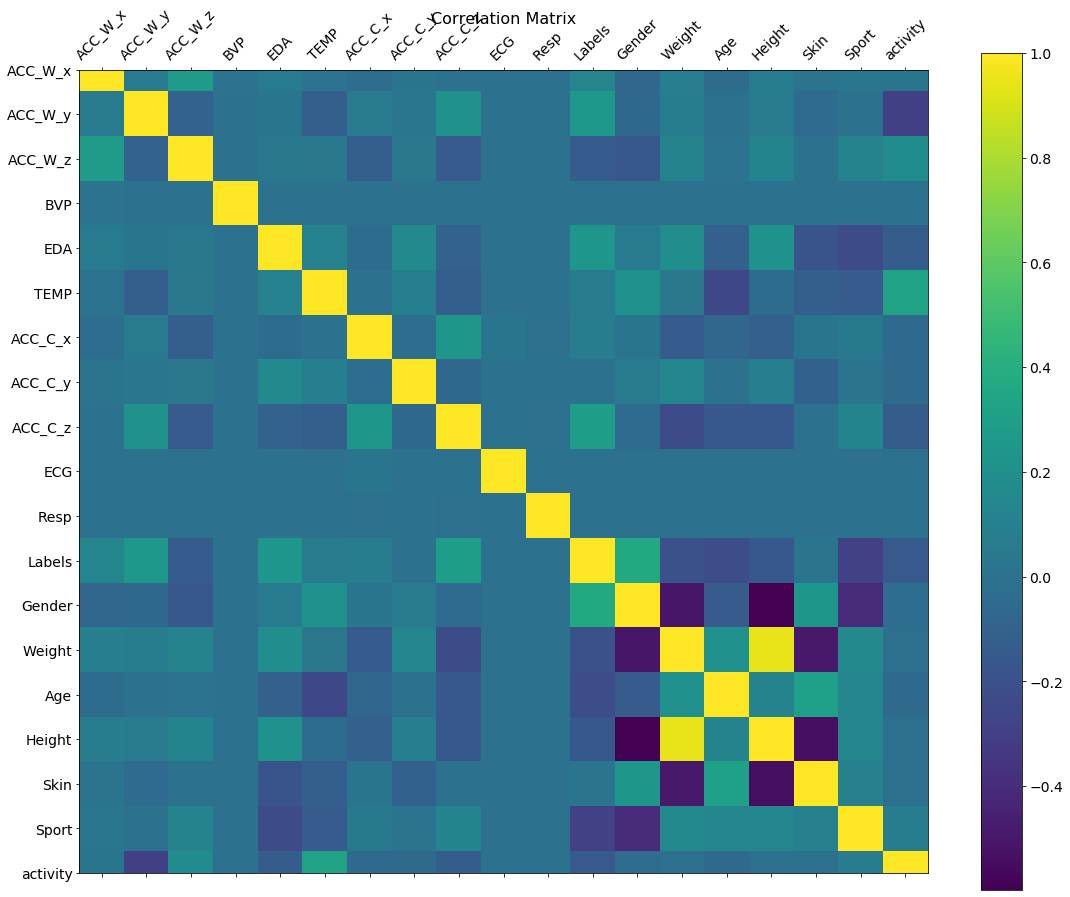

In [63]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_all_subjects.corr(), fignum=f.number)
plt.xticks(range(df_all_subjects.shape[1]), df_all_subjects.columns, fontsize=14, rotation=45)
plt.yticks(range(df_all_subjects.shape[1]), df_all_subjects.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [6]:
#on prépare les données pour tester les modèles

X = df_all_subjects.iloc[:, 0:17].values
y = df_all_subjects.iloc[:, 18].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
#on définit les modèles que l'on souhaite utiliser

names = [ "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost","Nearest Neighbors"
        ]

classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=20, random_state = 0),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    KNeighborsClassifier(),
 ]

In [55]:
reports_list = []
reports_list_names = []

In [56]:
#on teste les modèles sur les données

for name, clf in zip(names, classifiers):
        
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        report = classification_report(y_test,y_pred)
        
        print(name)
        print(classification_report(y_test,y_pred))
        reports_list.append(report)
        reports_list_names.append(name)


Gaussian Process
              precision    recall  f1-score   support

         0.0       0.53      0.61      0.57     28077
         1.0       0.91      0.78      0.84      7279
         2.0       0.64      0.44      0.52      5199
         3.0       0.48      0.02      0.04      3682
         4.0       0.55      0.73      0.63      5472
         5.0       0.87      0.41      0.55     10854
         6.0       0.50      0.73      0.60     21919
         7.0       0.45      0.55      0.49      7446
         8.0       0.60      0.36      0.45     13588

    accuracy                           0.57    103516
   macro avg       0.62      0.51      0.52    103516
weighted avg       0.60      0.57      0.55    103516



/home/clement/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree
              precision    recall  f1-score   support

         0.0       0.49      0.80      0.61     28077
         1.0       0.93      0.87      0.90      7279
         2.0       0.94      0.24      0.39      5199
         3.0       0.00      0.00      0.00      3682
         4.0       0.95      0.52      0.67      5472
         5.0       0.78      0.65      0.71     10854
         6.0       0.60      0.79      0.68     21919
         7.0       1.00      0.00      0.00      7446
         8.0       0.83      0.53      0.65     13588

    accuracy                           0.62    103516
   macro avg       0.72      0.49      0.51    103516
weighted avg       0.69      0.62      0.59    103516

Random Forest
              precision    recall  f1-score   support

         0.0       0.70      0.72      0.71     28077
         1.0       0.88      0.95      0.92      7279
         2.0       0.79      0.64      0.71      5199
         3.0       0.79      0.44      0.56      3

In [66]:
#on modifie les paramètres d'un modèle pour améliorer ses performances

classif = RandomForestClassifier(n_estimators=50, random_state=0)
classif.fit(X_train, y_train)
y_pred = classif.predict(X_test)

In [70]:
print("Random Forest")
print(classification_report(y_test,y_pred))

Random Forest
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     28077
         1.0       1.00      1.00      1.00      7279
         2.0       1.00      0.98      0.99      5199
         3.0       0.99      0.96      0.98      3682
         4.0       0.99      0.99      0.99      5472
         5.0       0.99      1.00      0.99     10854
         6.0       0.99      0.99      0.99     21919
         7.0       0.98      0.98      0.98      7446
         8.0       1.00      0.99      0.99     13588

    accuracy                           0.99    103516
   macro avg       0.99      0.98      0.99    103516
weighted avg       0.99      0.99      0.99    103516



Gaussian Process


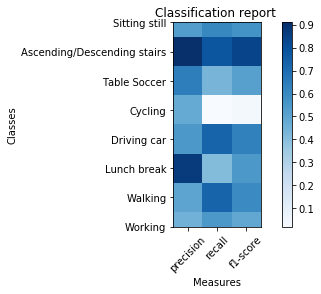

In [61]:
print(reports_list_names[0])
plot_classification_report(reports_list[0])

Random Forest


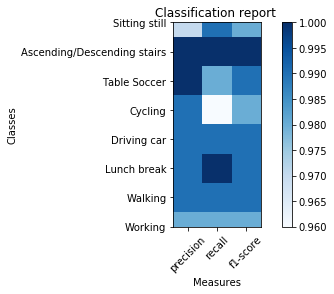

In [69]:
print("Random Forest")
plot_classification_report(classification_report(y_test,y_pred))